<a href="https://colab.research.google.com/github/SheilaLiborio/Desafio_qualidade_de_sono/blob/main/Desafio_Final_qualidade_sono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Final : Qualidade do Sono**

**Contexto:**
Voc√™ trabalha como cientista de dados para uma empresa de sa√∫de digital.
Seu time recebeu um conjunto de dados de um estudo com adultos que
monitoraram seus h√°bitos de vida e padr√µes de sono. A empresa deseja
desenvolver um sistema de alerta para pessoas com potencial risco de m√°
qualidade de sono.
**Objetivo:**
Construir um modelo de machine learning que classifique a qualidade dosono (por exemplo,"Boa","Moderada","Ruim") com base em vari√°veis de estilo de vida e sa√∫de. Onde:
- Ruim - 0-4
- Moderada - 5-6
- Boa - 7-10

# 1.Carregando os pacotes








In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import panel as pn
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from ipywidgets import widgets, VBox, Tab

#2.Leitura dos dados

In [ ]:
# lendo dos dados csv
df_sono= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep = ",")

In [ ]:
### leitura das 10 primeiras linhas
df_sono.head(10)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000            NaN  
8         120/80          70         8000            NaN  
9         120/80          70         8000            NaN

#3.An√°lise inicial dos dados

In [ ]:
# numero de obsersacoes
print(df_sono.shape[0])

374


In [ ]:
## verificando a estrutura b√°sica
print(df_sono.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
#verificando a quantidade de nulos e valores unicos
datadict = pd.DataFrame(df_sono.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_sono.isnull().sum()
datadict['%_Valores_Nulos'] = (df_sono.isnull().sum() / df_sono.shape[0]) * 100
datadict['NUnique']=df_sono.nunique()

datadict

Dtype  Valores_Nulos  %_Valores_Nulos  NUnique
Person ID                  int64              0          0.00000      374
Gender                    object              0          0.00000        2
Age                        int64              0          0.00000       31
Occupation                object              0          0.00000       11
Sleep Duration           float64              0          0.00000       27
Quality of Sleep           int64              0          0.00000        6
Physical Activity Level    int64              0          0.00000       16
Stress Level               int64              0          0.00000        6
BMI Category              object              0          0.00000        4
Blood Pressure            object              0          0.00000       25
Heart Rate                 int64              0          0.00000       19
Daily Steps                int64              0          0.00000       20
Sleep Disorder            object            219         58.55615        2

In [ ]:
## verificando estat√≠sticas descritivas
print("\n Estat√≠sticas descritivas:")
print(df_sono.describe())


 Estat√≠sticas descritivas:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25

#4.Gr√°fico - Distribuicao das Variaveis

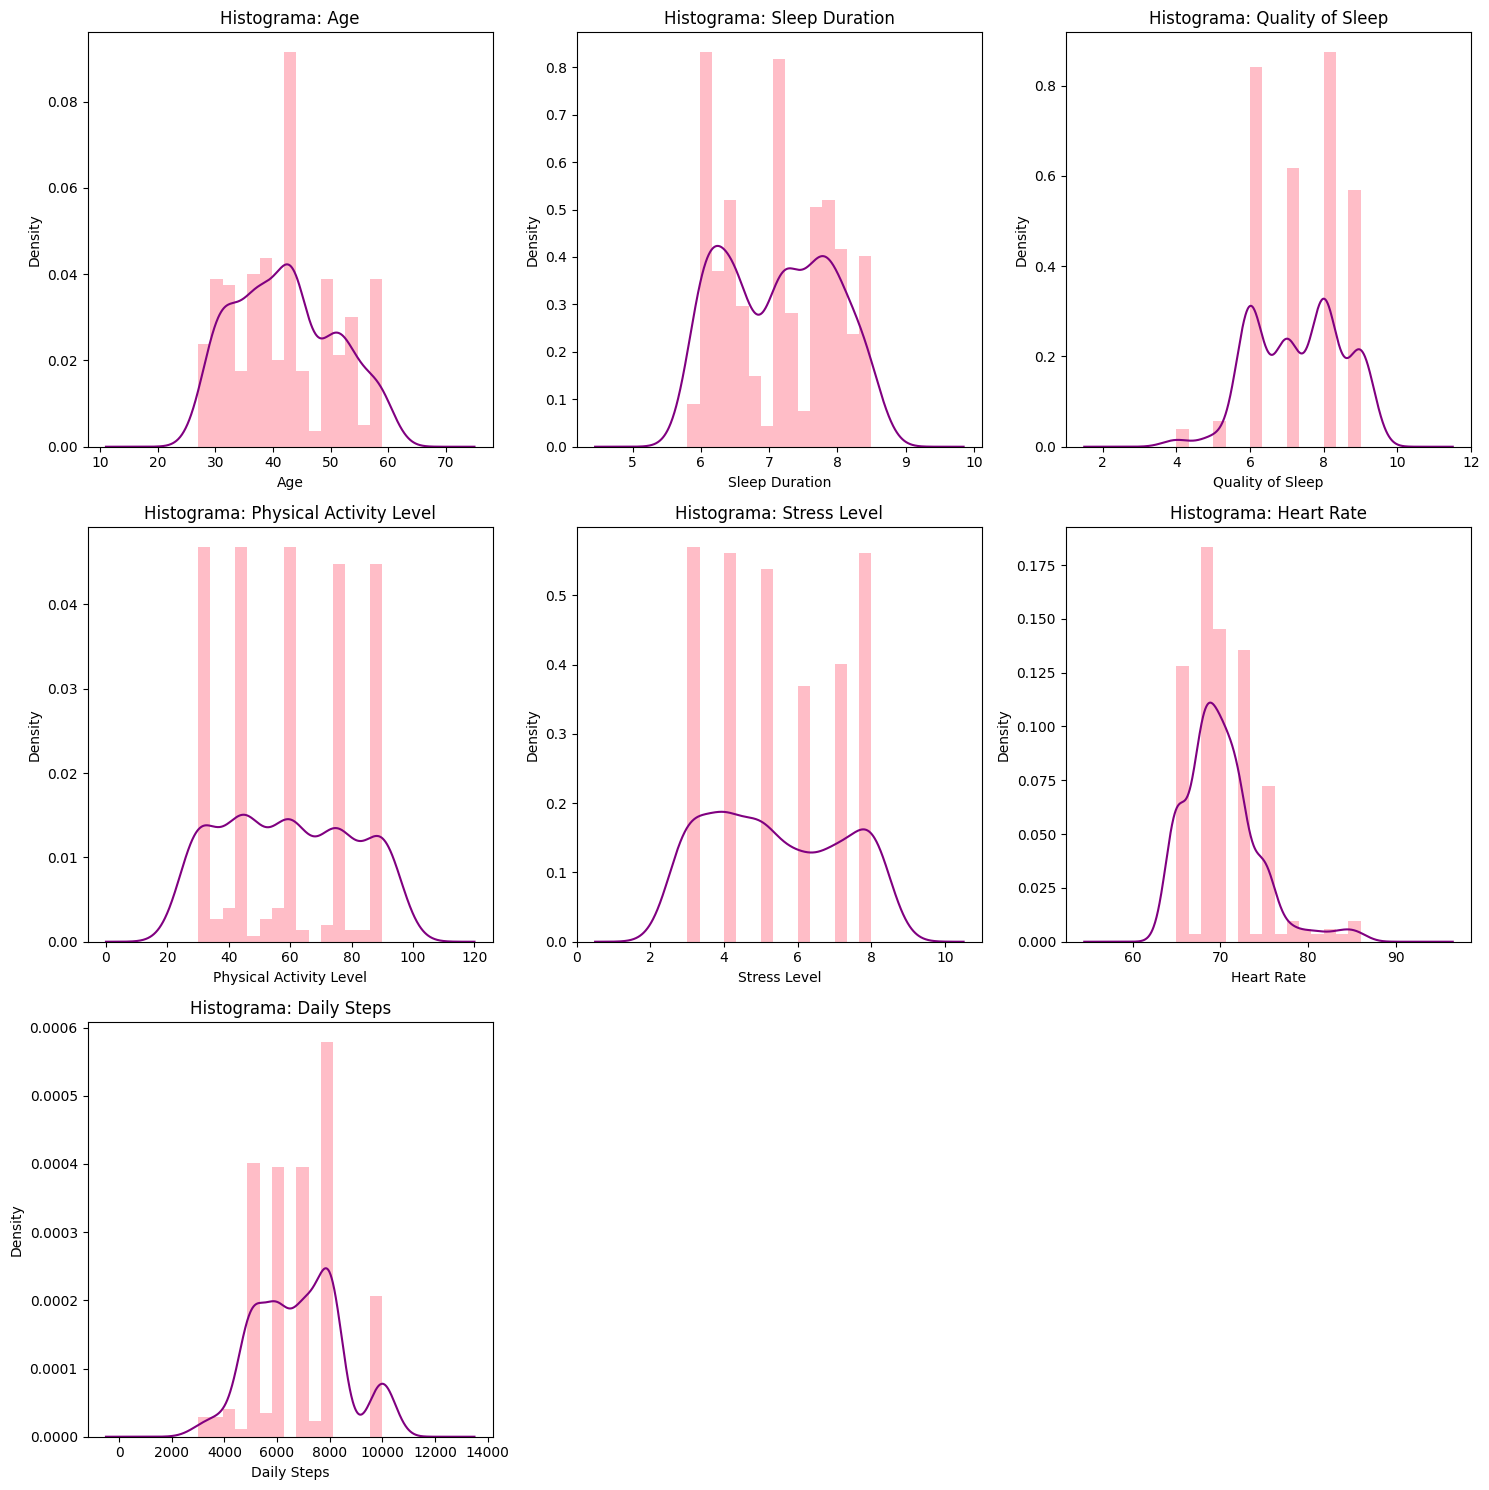

In [ ]:
# Selecionando apenas colunas num√©ricas, exceto a coluna 'Person ID'
num_cols = df_sono.select_dtypes(include=['number']).columns.drop('Person ID')
n = len(num_cols)
rows = (n // 3) + 1  # 3 plots por linha

plt.figure(figsize=(15, 5 * rows))

# Criando histograma + densidade para cada coluna num√©rica
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    ax = df_sono[col].hist(bins=15, density=True, stacked=True, color='lightpink', alpha=0.9)
    df_sono[col].plot(kind='density', color='purple')
    ax.set(xlabel=col)
    ax.set_title(f"Histograma: {col}")

plt.tight_layout()
plt.show()

## An√°lise Inicial
---
- A base de dados analisada √© relativamente pequena, com **374 observa√ß√µes**.
- Verificou-se que as vari√°veis **categ√≥ricas** encontram-se no formato *string*; para que o modelo as interprete corretamente, ser√° necess√°rio convert√™-las em **num√©ricas** por meio de codifica√ß√£o.
- Constatou-se que a vari√°vel **Sleep Disorder** apresenta aproximadamente **59% de valores ausentes**, os quais dever√£o ser tratados previamente √† modelagem.
- A vari√°vel **Blood Pressure** tamb√©m requer tratamento espec√≠fico para que possa ser considerada na an√°lise.
- Observou-se que nenhuma vari√°vel apresenta distribui√ß√£o normal.




#5.Limpeza dos dados

##Sleep Disorder

In [ ]:
#Atribuindo uma nova categoria "Sem Dist√∫rbio" para os valores ausentes da coluna Sleep Disorder
df_sono['Sleep Disorder'] = df_sono['Sleep Disorder'].fillna('Sem Dist√∫rbio')

In [ ]:
print('Distribui√ß√£o por categoria de dist√∫rbio do sono:')
print(df_sono['Sleep Disorder'].value_counts())

Distribui√ß√£o por categoria de dist√∫rbio do sono:
Sleep Disorder
Sem Dist√∫rbio    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64


##Blood Pressure

In [ ]:
# Separando Blood Pressure em Systolic'e 'Diastolic
df_sono[['Systolic', 'Diastolic']] = df_sono['Blood Pressure'].str.split('/', expand=True).astype(int)

# Removendo a coluna original
df_sono.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
# classificando a pressao arterial em categorias de acordo com a OMS
def classificar_pressao_oms(row):
    sbp = row['Systolic']
    dbp = row['Diastolic']

    if sbp < 90 or dbp < 60:
        return 'Hipotens√£o'
    elif sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp <= 129 or 80 <= dbp <= 84:
        return 'Normal Alta'
    elif 130 <= sbp <= 139 or 85 <= dbp <= 89:
        return 'Pr√©-hipertens√£o'
    elif 140 <= sbp <= 159 or 90 <= dbp <= 99:
        return 'Hipertens√£o Est√°gio 1'
    elif 160 <= sbp <= 179 or 100 <= dbp <= 109:
        return 'Hipertens√£o Est√°gio 2'
    elif sbp >= 180 or dbp >= 110:
        return 'Hipertens√£o Est√°gio 3'
    else:
        return 'Indefinida'

df_sono['Pressao_Arterial_OMS'] = df_sono.apply(classificar_pressao_oms, axis=1)

In [ ]:
# verificando a quantidade de registros em cada categoria
df_sono['Pressao_Arterial_OMS'].value_counts()

Pressao_Arterial_OMS
Pr√©-hipertens√£o          137
Normal Alta              125
Hipertens√£o Est√°gio 1     71
Normal                    41
Name: count, dtype: int64

#6.Diferen√ßas Entre os Grupos

##6.1.Mulheres X Homens

In [ ]:
#Separando o grupo de mulheres e homens
df_sono_homens = df_sono[df_sono['Gender'] == 'Male']
df_sono_mulheres = df_sono[df_sono['Gender'] == 'Female']

In [ ]:
#Graficos comparativos entre os dois grupos, considerando todas as variaveis.
pn.extension('plotly')

tabs = []

for col in num_cols:
    fig = px.box(
        df_sono,
        x='Gender',
        y=col,
        color='Gender',
        title=f'Boxplot: {col} por Gender',
        #points="all",
        template="plotly_white"
    )
    tabs.append((col, pn.pane.Plotly(fig, config={'responsive': True})))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-15-2196416818.py:2: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension('plotly')


Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})
    [3] Plotly(Figure, config={'responsive': True})
    [4] Plotly(Figure, config={'responsive': True})
    [5] Plotly(Figure, config={'responsive': True})
    [6] Plotly(Figure, config={'responsive': True})

In [ ]:
# M√©dias por g√™nero
df_sono.groupby('Gender')[['Sleep Duration','Age', 'Physical Activity Level', 'Heart Rate','Daily Steps', 'Stress Level']].mean()

Sleep Duration        Age  Physical Activity Level  Heart Rate  \
Gender                                                                   
Female        7.229730  47.405405                59.140541   69.259459   
Male          7.036508  37.074074                59.201058   71.052910   

        Daily Steps  Stress Level  
Gender                             
Female  6840.540541      4.675676  
Male    6793.650794      6.079365

##6.2.Faixas Et√°rias

In [ ]:
# Criando as faixas considerando a idade m√°xima
bins = [18, 30, 45, 60]
labels = ['19-30', '31-45', '46-59']

df_sono['Faixa Et√°ria'] = pd.cut(df_sono['Age'], bins=bins, labels=labels, right=False)

In [ ]:
pn.extension('plotly')

tabs = []

for col in num_cols:
    fig = px.box(
        df_sono,
        x='Faixa Et√°ria',
        y=col,
        color='Faixa Et√°ria',
        title=f'Boxplot: {col} por Faixa Et√°ria',
        #points="all",
        template="plotly_white"
    )
    tabs.append((col, pn.pane.Plotly(fig, config={'responsive': True})))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-18-2092002994.py:1: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})
    [3] Plotly(Figure, config={'responsive': True})
    [4] Plotly(Figure, config={'responsive': True})
    [5] Plotly(Figure, config={'responsive': True})
    [6] Plotly(Figure, config={'responsive': True})

# 7.Analise Pr√© Modelagem

##7.1.Vari√°veis Num√©ricas

### Correlacao

In [ ]:
# Calcular a correla√ß√£o entre todas as colunas num√©ricas
corr_matrix = df_sono[num_cols].corr()
corr_matrix

Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.178993     -0.422344   -0.225606   
Sleep Duration                          0.212360     -0.811023   -0.516455   
Quality of Sleep                        0.192896     -0.898752   -0.659865   
Physical Activity Level                 1.000000     -0.034134    0.136971   
Stress Level                           -0.034134      1.000000    0.670026   
Heart Rate                              0.136971      0.670026    1.000000   
Daily Steps                             0.772723      0.186829   -0.030309   

                         Daily Steps  
Age                         0.057973  
Sleep Duration             -0.039533  
Quality of Sleep            0.016791  
Physical Activity Level     0.772723  
Stress Level                0.186829  
Heart Rate                 -0.030309  
Daily Steps                 1.000000

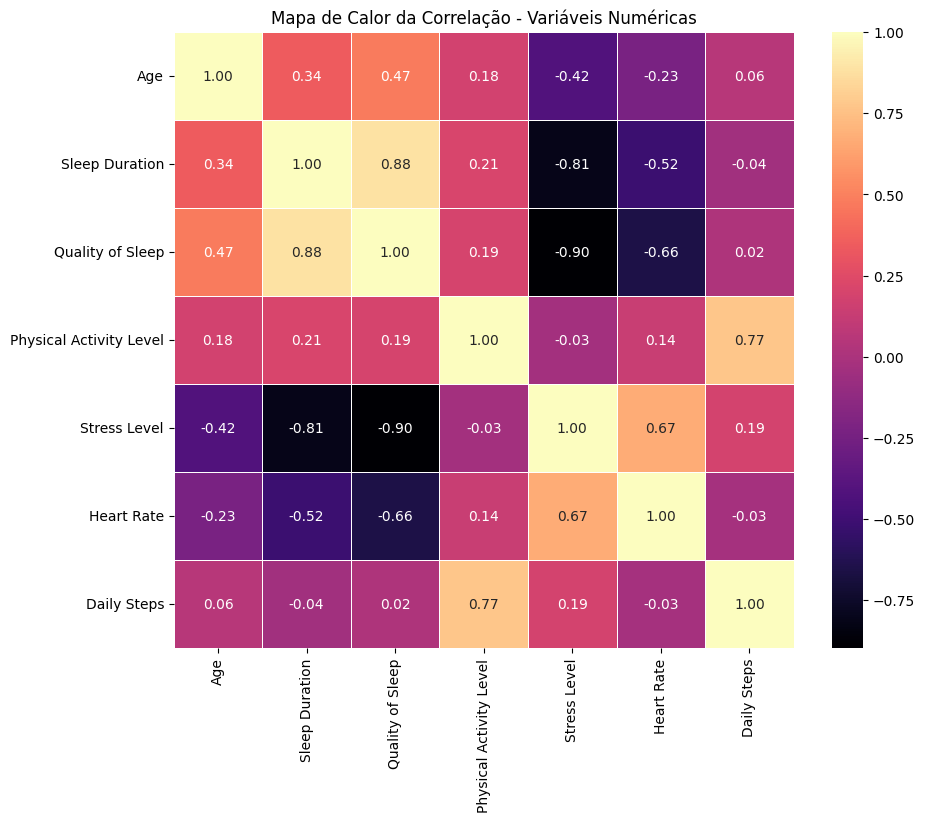

In [ ]:
# Cria o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # mostra os valores dentro dos quadrados
    fmt=".2f",        # 2 casas decimais
    cmap='magma',  # paleta de cores
    linewidths=0.5    # linhas divis√≥rias entre os quadrados
)
plt.title('Mapa de Calor da Correla√ß√£o - Vari√°veis Num√©ricas')
plt.show()

In [ ]:
# exibindo as variaveis que tem maior correlacao com a variavel alvo "Quality of Sleep"
corr_qos = corr_matrix['Quality of Sleep'].sort_values(ascending=False)
print(corr_qos)

Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


###Avaliando multicolinearidade

In [ ]:
## Identificando quais vari√°veis num√©ricas preditoras t√™m alta correla√ß√£o entre si

# transforma a matriz para uma coluna √∫nica  e filtrando
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variavel 1', 'Variavel 2', 'Correlacao']

# Excluindo diagonal e pares com a vari√°vel alvo
corr_pairs = corr_pairs[
    (corr_pairs['Variavel 1'] != corr_pairs['Variavel 2']) &
    (~corr_pairs['Variavel 1'].isin(['Quality of Sleep'])) &
    (~corr_pairs['Variavel 2'].isin(['Quality of Sleep']))
]
corr_pairs['AbsCorr'] = np.abs(corr_pairs['Correlacao'])
corr_pairs = corr_pairs.sort_values(by='AbsCorr', ascending=False)

# Mostrando s√≥ as que tem forte correlacao entre as variveis explicativas
corr_fortes = corr_pairs[corr_pairs['AbsCorr'] > 0.7]
print(corr_fortes)

                 Variavel 1               Variavel 2  Correlacao   AbsCorr
11           Sleep Duration             Stress Level   -0.811023  0.811023
29             Stress Level           Sleep Duration   -0.811023  0.811023
27  Physical Activity Level              Daily Steps    0.772723  0.772723
45              Daily Steps  Physical Activity Level    0.772723  0.772723


- Com a matriz de correla√ß√£o, identificamos que **seis vari√°veis** s√£o explicativas para a vari√°vel alvo:
  - *Sleep Duration*
  - *Age*
  - *Physical Activity Level*
  - *Daily Steps*
  - *Heart Rate*
  - *Stress Level*

- Na avalia√ß√£o dos **pares de vari√°veis preditoras**, com o objetivo de evitar **multicolinearidade**, verificamos que os pares *Sleep Duration* e *Stress Level*, e *Physical Activity Level* e *Daily Steps* apresentam alta correla√ß√£o entre si. Assim, optamos por considerar apenas uma vari√°vel de cada par no modelo:
  - *Stress Level* e *Physical Activity Level*

- Com isso, chegamos √†s **quatro vari√°veis num√©ricas explicativas selecionadas**:
  - *Age*
  - *Physical Activity Level*
  - *Heart Rate*
  - *Stress Level*

### Gr√°ficos

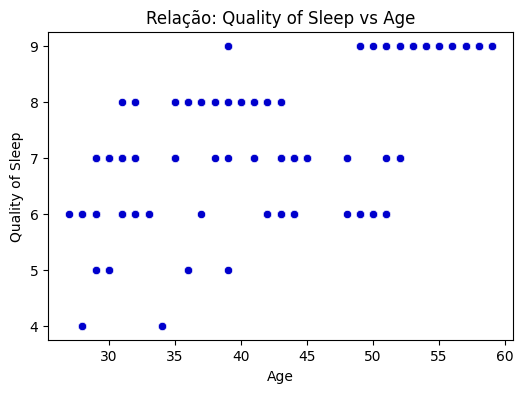

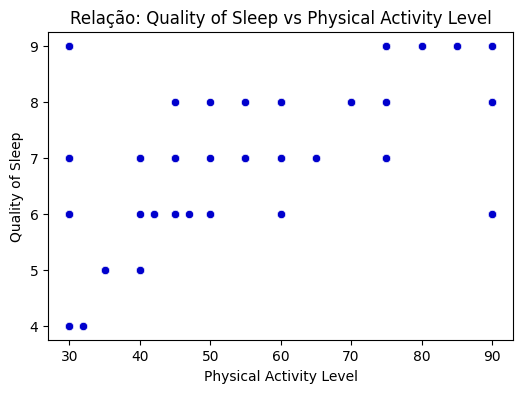

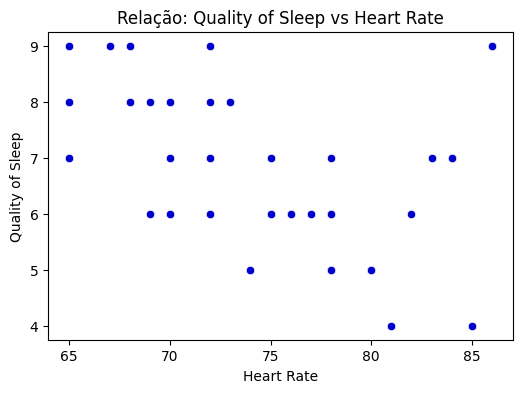

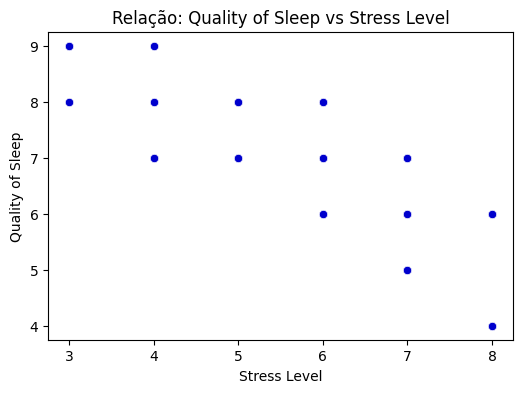

In [ ]:
# Lista das vari√°veis explicativas
var_numericas = ['Age', 'Physical Activity Level', 'Heart Rate', 'Stress Level']

# Loop para gerar um scatter plot para cada uma em rela√ß√£o √† Quality of Sleep
for var_numericas in var_numericas:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_sono, x=var_numericas, y='Quality of Sleep', color='mediumblue')
    plt.title(f'Rela√ß√£o: Quality of Sleep vs {var_numericas}')
    plt.xlabel(var_numericas)
    plt.ylabel('Quality of Sleep')
    plt.show()

##7.2.Variaveis Categ√≥ricas

In [ ]:
#selecinando as colunas categoricas
var_categoricas = df_sono.select_dtypes(include=['object'])
var_categoricas.columns

Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder',
       'Pressao_Arterial_OMS'],
      dtype='object')

In [ ]:
# Classifica√ß√£o da Qualidade de Sono de acordo com o escopo do projeto
def classificar_sono(valor):
    if valor <= 4:
        return 'Ruim'
    elif valor <= 6:
        return 'Moderada'
    else:
        return 'Boa'

df_sono['Qualidade Sono Cat'] = df_sono['Quality of Sleep'].apply(classificar_sono)

### Teste Qui-quadrado

In [ ]:
# Teste Qui-quadrado para entender a correlacao entre as variaves categoricas e a variavel alvo

resultados = [] # Lista para guardar os resultados
for var in var_categoricas:
    tabela = pd.crosstab(df_sono[var], df_sono['Qualidade Sono Cat']) # Tabela de conting√™ncia
    chi2, p, dof, ex = chi2_contingency(tabela) # Teste Qui-quadrado
    interpretacao = 'Associa√ß√£o significativa' if p < 0.05 else 'Sem associa√ß√£o significativa'
    resultados.append({
        'Vari√°vel': var,
        'Qui-quadrado': round(chi2, 3),
        'p-valor': round(p, 4),
        'Interpreta√ß√£o': interpretacao
    })

# Converter em DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar resultados
print(resultados_df)

               Vari√°vel  Qui-quadrado  p-valor             Interpreta√ß√£o
0                Gender        11.031    0.004  Associa√ß√£o significativa
1            Occupation       407.375    0.000  Associa√ß√£o significativa
2          BMI Category       109.769    0.000  Associa√ß√£o significativa
3        Sleep Disorder        48.491    0.000  Associa√ß√£o significativa
4  Pressao_Arterial_OMS        32.569    0.000  Associa√ß√£o significativa


- Com o teste Qui-quadrado, verificamos que **todas as vari√°veis categ√≥ricas** apresentam associa√ß√£o estat√≠stica com a vari√°vel alvo. Portanto, todas ser√£o consideradas na modelagem.
- Vari√°veis categ√≥ricas selecionadas:
  - *Gender*
  - *Occupation*
  - *BMI Category*
  - *Sleep Disorder*
  - *Pressao_Arterial_OMS*
  - *Qualidade Sono Cat* (vari√°vel alvo)

### Analisando a granulosidade das colunas categ√≥ricas

In [ ]:
df_sono['Qualidade Sono Cat'].value_counts()

Qualidade Sono Cat
Boa         257
Moderada    112
Ruim          5
Name: count, dtype: int64

In [ ]:
#Selecionando colunas categoricas
var_categoricas = df_sono.select_dtypes(include=['object']).columns.tolist()

# Remove o nome da lista
var_categoricas.remove('Qualidade Sono Cat')

for col in var_categoricas:
    print(f'\n=== {col} ===')
    print(df_sono[col].value_counts(dropna=False))
    print(f'√önicos: {df_sono[col].nunique()}')


=== Gender ===
Gender
Male      189
Female    185
Name: count, dtype: int64
√önicos: 2

=== Occupation ===
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
√önicos: 11

=== BMI Category ===
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
√önicos: 4

=== Sleep Disorder ===
Sleep Disorder
Sem Dist√∫rbio    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64
√önicos: 3

=== Pressao_Arterial_OMS ===
Pressao_Arterial_OMS
Pr√©-hipertens√£o          137
Normal Alta              125
Hipertens√£o Est√°gio 1     71
Normal                    41
Name: count, dtype: int64
√önicos: 4


- Temos vari√°veis categ√≥ricas com granularidade alta ‚Äî ou seja, com muitas categorias distintas ‚Äî o que pode causar problemas no modelo, principalmente aumentando o risco de overfitting.
- Por isso, precisamos fazer agrupamentos l√≥gicos e reunindo categorias raras em grupos mais gen√©ricos.

####Agrupamento da vari√°vel Occupation

In [ ]:
def map_ocupacao(x):
    if x in ['Engineer', 'Scientist', 'Software Engineer']:
        return 'Tecnologia'
    elif x == 'Lawyer':
        return 'Juridico'
    elif x == 'Teacher':
        return 'Educacao'
    elif x == 'Accountant':
        return 'Contabilidade'
    elif x in ['Salesperson', 'Sales Representative', 'Manager']:
        return 'Vendas_Gerencia'
    elif x == 'Nurse':
        return 'Nurse'
    elif x == 'Doctor':
        return 'Doctor'
    else:
        return 'Outros'

df_sono['Occupation_Grouped'] = df_sono['Occupation'].apply(map_ocupacao)
#df_sono.drop('Occupation', axis=1, inplace=True) #Excluindo a coluna original

In [ ]:
#novas categorias e quantidade dos valores, apos agrupamento
df_sono['Occupation_Grouped'].value_counts()

Occupation_Grouped
Nurse              73
Doctor             71
Tecnologia         71
Juridico           47
Educacao           40
Contabilidade      37
Vendas_Gerencia    35
Name: count, dtype: int64

Antes do agrupamento, a vari√°vel apresentava 11 categorias distintas, com algumas pouco frequentes, como *Scientist*, *Software Engineer* e *Manager*.

Ap√≥s o agrupamento, as categorias foram consolidadas em grupos funcionais principais:

- **Sa√∫de**: Nurse e Doctor  
- **Tecnologia**: Engineer, Scientist e Software Engineer  
- **Jur√≠dico**: Lawyer  
- **Educa√ß√£o**: Teacher  
- **Contabilidade**: Accountant  
- **Vendas e Ger√™ncia**: Salesperson, Sales Representative e Manager   

Esse agrupamento visa reduzir a granularidade e evitar o overfitting, facilitando a interpreta√ß√£o do modelo.

#### Agrupamento da vari√°vel BMI Category

In [ ]:
def map_bmi(x):
    if x in ['Normal', 'Normal Weight']:
        return 'Normal'
    elif x in ['Obese', 'Overweight']:
        return 'Acima_Peso'
    else:
        return 'Outro'

df_sono['BMI_Category_Grouped'] = df_sono['BMI Category'].apply(map_bmi)
#df_sono.drop('BMI Category', axis=1, inplace=True)


Antes do agrupamento, a vari√°vel apresentava **4** categorias distintas com as seguintes frequ√™ncias:

| Categoria      | Contagem |
|----------------|----------|
| Normal         | 195      |
| Overweight     | 148      |
| Normal Weight  | 21       |
| Obese          | 10       |

Ap√≥s o agrupamento, foram criadas **duas** categorias principais:

- **Normal**: combina√ß√£o das categorias *Normal* e *Normal Weight* (totalizando 216 registros).
- **Acima_Peso**: combina√ß√£o das categorias *Overweight* e *Obese* (totalizando 158 registros).

Esse agrupamento simplifica a granularidade da vari√°vel, facilitando a modelagem e a interpreta√ß√£o dos resultados, al√©m de evitar poss√≠veis problemas com categorias pouco frequentes.

In [ ]:
df_sono['BMI_Category_Grouped'].value_counts()

BMI_Category_Grouped
Normal        216
Acima_Peso    158
Name: count, dtype: int64

#### Agrupamento da vari√°vel Sleep Disorder

In [ ]:
# Agrupar Apneia e Ins√¥nia em uma √∫nica categoria textual
df_sono['Sleep_Disorder_Grouped'] = df_sono['Sleep Disorder'].apply(
    lambda x: 'Tem Dist√∫rbio' if x != 'Sem Dist√∫rbio' else 'Sem Dist√∫rbio'
)
#df_sono.drop('Sleep Disorder', axis=1, inplace=True)

# Verificar resultado
print(df_sono['Sleep_Disorder_Grouped'].value_counts())


Sleep_Disorder_Grouped
Sem Dist√∫rbio    219
Tem Dist√∫rbio    155
Name: count, dtype: int64


Antes do agrupamento, a vari√°vel apresentava 3 categorias:

- Sem Dist√∫rbio: 219 registros
- Sleep Apnea: 78 registros
- Insomnia: 77 registros

Ap√≥s o agrupamento, as categorias *Sleep Apnea* e *Insomnia* foram unificadas em uma √∫nica categoria **Tem Dist√∫rbio**, resultando em:

- Sem Dist√∫rbio: 219 registros
- Tem Dist√∫rbio: 155 registros

Esse agrupamento simplifica a vari√°vel, destacando apenas a presen√ßa ou aus√™ncia de dist√∫rbio do sono, o que facilita a interpreta√ß√£o e a codifica√ß√£o na etapa de modelagem.

#8.Tratando os Dados

### Sele√ß√£o de Vari√°veis para o Modelo

Ap√≥s realizarmos uma an√°lise de **correla√ß√£o** entre as vari√°veis num√©ricas, verifica√ß√£o de **multicolinearidade** e **tratamento de granularidade** nas vari√°veis categ√≥ricas ‚Äî agrupando categorias com baixa representatividade ‚Äî definimos inicialmente um conjunto mais amplo de vari√°veis para alimentar os modelos de machine learning.

Esse conjunto inclu√≠a:

**Vari√°veis num√©ricas iniciais:**
- `Age`
- `Physical Activity Level`
- `Heart Rate`
- `Stress Level`

**Vari√°veis categ√≥ricas iniciais:**
- `Gender`
- `Occupation_Grouped`
- `BMI_Category_Grouped`
- `Sleep_Disorder_Grouped`
- `Pressao_Arterial_OMS`

**Vari√°vel alvo:**
- `Qualidade Sono Cat`

---

No entanto, ao aplicar esse conjunto mais completo nos modelos, percebemos sinais de **overfitting**.  
Isso pode ser explicado principalmente por dois fatores:

1. A alta complexidade do modelo em rela√ß√£o ao tamanho reduzido da base de dados.
2. A presen√ßa de vari√°veis que, de certa forma, poderiam estar **repetindo ou mascarando informa√ß√µes** j√° contidas na vari√°vel alvo ‚Äî o que pode confundir o modelo ao inv√©s de contribuir com novas evid√™ncias.

---

Para reduzir esse risco e simplificar o modelo, decidimos **diminuir o n√∫mero de vari√°veis preditoras**, priorizando aquelas com **impacto pr√°tico direto no projeto**.  
Ou seja, optamos por manter apenas as vari√°veis mais relevantes para os **alertas personalizados** que o sistema poder√° gerar para ajudar os usu√°rios a melhorar a qualidade do sono.

---

### Conjunto Final de Vari√°veis Utilizadas

**Vari√°veis num√©ricas:**
- `Age`
- `Physical Activity Level`

**Vari√°veis categ√≥ricas:**
- `Gender`
- `BMI_Category_Grouped`
- `Sleep_Disorder_Grouped`

**Vari√°vel alvo:**
- `Qualidade Sono Cat`



In [ ]:
##DataFrame final, para aplicar no modelo
df_filtrado = df_sono[
    [
        'Age',
        'Physical Activity Level',
        'Gender',
        'BMI_Category_Grouped',
        'Sleep_Disorder_Grouped',
        'Qualidade Sono Cat'
    ]
]

Convertendo as vari√°veis categ√≥ricas em vari√°veis num√©ricas bin√°rias (dummies).

In [ ]:
df_features =pd.get_dummies(df_filtrado, columns=[
        'Gender',
        'BMI_Category_Grouped',
        'Sleep_Disorder_Grouped',
        ],dtype=int,drop_first=True)

In [ ]:
df_features['Qualidade Sono Cat'].value_counts()

Qualidade Sono Cat
Boa         257
Moderada    112
Ruim          5
Name: count, dtype: int64

#9.Regressao logistica Multinomial





## 9.1.Definindo vari√°veis preditoras e alvo

In [ ]:
# x contem as variaveis explicativas
X = df_features.drop('Qualidade Sono Cat', axis=1)

# y contem a variavel de interesse
y = df_features['Qualidade Sono Cat']

## 9.2.Separando treino (80%) e teste (20%)

In [ ]:
#Difisao da base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Random_state=42 -> Garante que a divis√£o dos dados ser√° sempre a mesma toda vez que rodar o c√≥digo (reprodutibilidade).
- Stratify=y -> Garante que a propor√ß√£o das classes em y ser√° mantida nos dois conjuntos (treino e teste).
- Isso √© importante em problemas de classifica√ß√£o, principalmente quando h√° classes desbalanceada, evitando que o modelo aprenda com dados desbalanceados.

## 9.2.Balanceando as classes na base de treino

In [ ]:
# Verificando a quantidade de classes na base de treino
print("Distribui√ß√£o antes do SMOTE:", Counter(y_train))

Distribui√ß√£o antes do SMOTE: Counter({'Boa': 205, 'Moderada': 90, 'Ruim': 4})


In [ ]:
#Aplicar SMOTE no conjunto de treino para balancear classes (oversampling)
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Verificando a quantidade de classes na base de treino apos banceamento
print("Distribui√ß√£o ap√≥s o SMOTE:", Counter(y_train_res))

Distribui√ß√£o ap√≥s o SMOTE: Counter({'Boa': 205, 'Moderada': 205, 'Ruim': 205})


-	Identificamos que nossa vari√°vel alvo estava desbalanceada: ‚ÄòBoa‚Äô: 205, ‚ÄòModerada‚Äô: 90, ‚ÄòRuim‚Äô: 4 ‚Äî o que n√£o √© o ideal para testar o modelo de forma justa.
- Foi aplicado o recurso de oversampling, que cria amostras sint√©ticas para equilibrar as classes na base de treino.
- √â fundamental aplicar o balanceamento somente na base de treino, para evitar vazamento de informa√ß√µes para o teste.
- Ap√≥s o balanceamento, as classes ficaram balanceadas: ‚ÄòBoa‚Äô: 205, ‚ÄòModerada‚Äô: 205, ‚ÄòRuim‚Äô: 205.

##9.3.Instanciando e treinando o modelo multinomial com dados balanceados

In [ ]:
#Instanciar e treinar o modelo multinomial com classes balanceados
logreg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=5000)
logreg.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=5000)

Previsoes do modelo

In [ ]:
# Fazendo previs√µes no conjunto de teste original (n√£o balanceado)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

In [ ]:
# Cria uma c√≥pia para armazenar resultados
X_test_resultado = X_test.copy()
X_test_resultado["Previsao_Modelo"] = y_pred
X_test_resultado["Probabilidade"] = y_pred_proba
X_test_resultado

Age  Physical Activity Level  Gender_Male  BMI_Category_Grouped_Normal  \
100   36                       60            0                            1   
156   39                       60            1                            1   
302   51                       55            0                            1   
366   59                       75            0                            0   
200   43                       45            1                            0   
..   ...                      ...          ...                          ...   
335   54                       30            0                            1   
112   37                       60            0                            1   
1     28                       60            1                            1   
363   59                       75            0                            0   
98    36                       60            0                            1   

     Sleep_Disorder_Grouped_Tem Dist√∫rbio Previsao_Modelo  Probabilidade  
100                                     0             Boa       0.154875  
156                                     0             Boa       0.205005  
302                                     0             Boa       0.020756  
366                                     1             Boa       0.229739  
200                                     1        Moderada       0.927907  
..                                    ...             ...            ...  
335                                     0             Boa       0.021269  
112                                     0             Boa       0.136224  
1                                       0        Moderada       0.573535  
363                                     1             Boa       0.229739  
98                                      0             Boa       0.154875  

[75 rows x 7 columns]

##9.4.Performance do Modelo

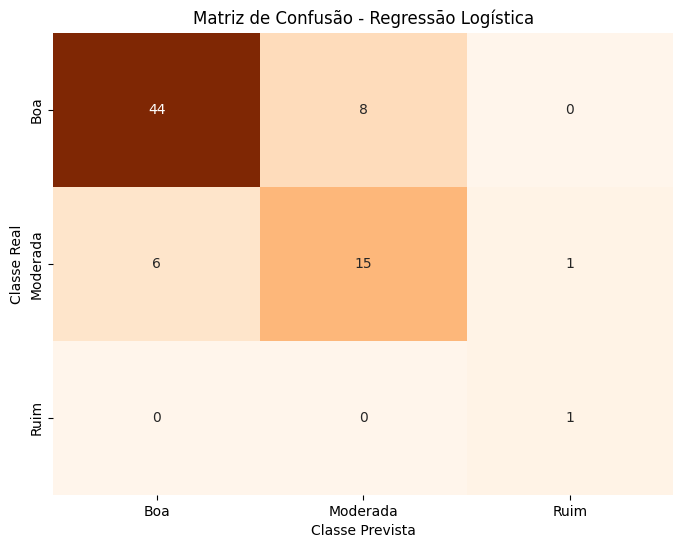

Acur√°cia: 0.8
Precis√£o (weighted): 0.808
Recall (weighted): 0.8
F1-score (weighted): 0.803


In [ ]:
# Calculando matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

# Calculando m√©tricas com average apropriado
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotando a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confus√£o - RegressƒÅo Log√≠stica')
plt.show()

# Imprimindo as m√©tricas
print("Acur√°cia:", round(accuracy, 3))
print("Precis√£o (weighted):", round(precision, 3))
print("Recall (weighted):", round(recall, 3))
print("F1-score (weighted):", round(f1, 3))

##9.5.Vari√°veis mais relevantes para o modelo por classes

In [ ]:
#!pip install jupyter_bokeh

In [ ]:

coef = logreg.coef_
classes = logreg.classes_
features = X_train_res.columns

pn.extension('plotly')
# Cria uma lista de FigureWidgets para cada classe
tabs = []

for idx, classe in enumerate(classes):
    coef_classe = coef[idx]
    indices = np.argsort(np.abs(coef_classe))
    top_features = features[indices][-10:]
    top_importances = coef_classe[indices][-10:]

    df_plot = pd.DataFrame({
        'Feature': top_features,
        'Coeficiente': top_importances
    }).sort_values('Coeficiente')

    fig = px.bar(
        df_plot,
        x='Coeficiente',
        y='Feature',
        orientation='h',
        color='Coeficiente',
        color_continuous_scale=['red', 'darkorange'],
        title=f'Top 10 Coeficientes - Classe: {classe}- RegressƒÅo Logistica',
        template='plotly_white'
    )

    tabs.append((
        f"Classe: {classe}",
        pn.pane.Plotly(fig, config={'responsive': True})
    ))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-47-1353867406.py:5: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})

## 9.6.An√°lise Geral ‚Äî Regressao Log√≠stica
- Coeficientes positivos indicam que o aumento da vari√°vel est√° associado a uma maior probabilidade da classe correspondente.
- Coeficientes negativos indicam associa√ß√£o inversa √†quela classe.

- Pela regress√£o log√≠stica, identificamos as principais vari√°veis associadas √† classe Ruim:
 -	‚úÖ Dist√∫rbio do sono: ter algum dist√∫rbio aumenta significativamente o risco de sono ruim.
 -	‚úÖ Atividade f√≠sica: n√≠veis mais altos de atividade f√≠sica reduzem o risco.
 -	‚úÖ IMC normal: estar dentro do peso normal tamb√©m reduz a chance de sono ruim.
 -	‚úÖ Idade e g√™nero: podem ter rela√ß√£o, mas a√ß√µes diretas s√£o menos pr√°ticas aqui.


In [ ]:
# Pega top 10 geral
abs_sum = np.sum(np.abs(coef), axis=0)
indices = np.argsort(abs_sum)[-10:]
top_features = features[indices]

# Cabe√ßalho da tabela
header = ["Feature"] + [f"Coef. {classe}" for classe in classes]
print("{:<25} {:>12} {:>12} {:>12}".format(*header))

# Separador
print("-" * 65)

# Linhas da tabela
for feat in top_features:
    idx_feat = list(features).index(feat)
    valores = []
    for i in range(len(classes)):
        val = coef[i][idx_feat]
        valores.append(f"{val:.4f}")
    print("{:<25} {:>12} {:>12} {:>12}".format(feat, *valores))

Feature                      Coef. Boa Coef. Moderada   Coef. Ruim
-----------------------------------------------------------------
Age                             0.2591       0.1089      -0.3680
Physical Activity Level         0.3199       0.3008      -0.6207
Gender_Male                     0.6155       1.4075      -2.0231
Sleep_Disorder_Grouped_Tem Dist√∫rbio      -1.8508      -0.1752       2.0260
BMI_Category_Grouped_Normal       2.6805       0.1304      -2.8109


#10.√Årvore de Decis√£o


=== √Årvore de Decis√£o ===
Acur√°cia: 0.947
Precis√£o: 0.949
Recall: 0.947
F1-score: 0.947


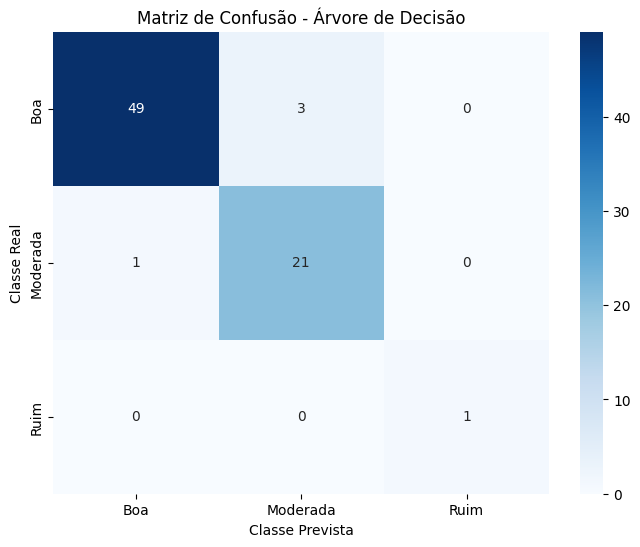

In [ ]:
arvore = DecisionTreeClassifier(
    max_depth=5,# Limita quantos splits empilhados a √°rvore pode fazer
    min_samples_leaf=10, #Impede que a √°rvore crie folhas finais com menos de 10 registros.
    random_state=42
)
arvore.fit(X_train_res, y_train_res)

# Previs√£o no conjunto de teste original
y_pred_arvore = arvore.predict(X_test)

# M√©tricas √Årvore
cm_arvore = confusion_matrix(y_test, y_pred_arvore)
accuracy_arvore = accuracy_score(y_test, y_pred_arvore)
precision_arvore = precision_score(y_test, y_pred_arvore, average='weighted')
recall_arvore = recall_score(y_test, y_pred_arvore, average='weighted')
f1_arvore = f1_score(y_test, y_pred_arvore, average='weighted')

print("\n=== √Årvore de Decis√£o ===")
print("Acur√°cia:", round(accuracy_arvore, 3))
print("Precis√£o:", round(precision_arvore, 3))
print("Recall:", round(recall_arvore, 3))
print("F1-score:", round(f1_arvore, 3))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_arvore))

# Matriz de confus√£o √Årvore
plt.figure(figsize=(8, 6))
sns.heatmap(cm_arvore, annot=True, cmap='Blues', fmt='g',
            xticklabels=arvore.classes_, yticklabels=arvore.classes_)
plt.title("Matriz de Confus√£o - √Årvore de Decis√£o")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()


##10.1.Vari√°veis mais relevantes para o modelo

In [ ]:
# Ativa a extens√£o Plotly para o Panel
pn.extension('plotly')

# Pega as import√¢ncias
importancias = arvore.feature_importances_
features = X_train_res.columns

# Cria DataFrame
df_importancia = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values('Importancia', ascending=True).head(10)

# Cria gr√°fico
fig = px.bar(
    df_importancia,
    x='Importancia',
    y='Feature',
    orientation='h',
    color='Importancia',
    color_continuous_scale=['red', 'darkblue'],
    title='Import√¢ncias - √Årvore de Decis√£o',
    template='plotly_white'
)

# Exibe o gr√°fico no Panel
pn.pane.Plotly(fig).servable()

/tmp/ipython-input-50-3140141127.py:2: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Plotly(Figure)

##10.1. An√°lise Geral ‚Äî √Årvore de Decis√£o

- As **import√¢ncias** da √°rvore mostram quais vari√°veis foram mais usadas para separar as classes de qualidade de sono.
- Quanto **maior a import√¢ncia**, maior a influ√™ncia dessa vari√°vel na decis√£o final.

**Principais vari√°veis:**
- ‚úÖ **IMC normal (`BMI_Category_Grouped_Normal`)** ‚Äî maior relev√¢ncia na √°rvore.
- ‚úÖ **Atividade f√≠sica (`Physical Activity Level`)** ‚Äî tamb√©m muito relevante.
- ‚úÖ **Idade (`Age`)** ‚Äî impacto moderado.
- üö´ **Dist√∫rbio do sono** e **G√™nero** ‚Äî n√£o foram usados nos splits desta √°rvore (import√¢ncia zero).


#11.Modelo Random Forest


=== Random Forest ===
Acur√°cia: 0.947
Precis√£o: 0.947
Recall: 0.947
F1-score: 0.947


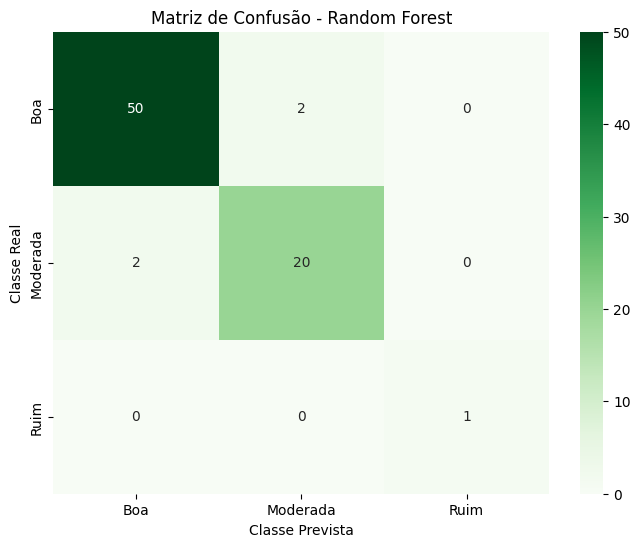

In [ ]:
floresta = RandomForestClassifier(
    max_depth=5, # Limita quantos splits empilhados a √°rvore pode fazer
    min_samples_leaf=10, #  Impede que a √°rvore crie folhas finais com menos de 10 registros.
    random_state=42
)
floresta.fit(X_train_res, y_train_res)

# Previs√£o Random Forest
y_pred_floresta = floresta.predict(X_test)

# M√©tricas Random Forest
cm_floresta = confusion_matrix(y_test, y_pred_floresta)
accuracy_floresta = accuracy_score(y_test, y_pred_floresta)
precision_floresta = precision_score(y_test, y_pred_floresta, average='weighted')
recall_floresta = recall_score(y_test, y_pred_floresta, average='weighted')
f1_floresta = f1_score(y_test, y_pred_floresta, average='weighted')

print("\n=== Random Forest ===")
print("Acur√°cia:", round(accuracy_floresta, 3))
print("Precis√£o:", round(precision_floresta, 3))
print("Recall:", round(recall_floresta, 3))
print("F1-score:", round(f1_floresta, 3))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_floresta))

# Matriz de confus√£o Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_floresta, annot=True, cmap='Greens', fmt='g',
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
plt.title("Matriz de Confus√£o - Random Forest")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

##11.1 Vari√°veis mais relevantes para o modelo

In [ ]:
# Ativa extens√£o Plotly para Panel
pn.extension('plotly')

# Pega as import√¢ncias do modelo j√° treinado
importancias_floresta = floresta.feature_importances_
features_floresta = X_train_res.columns

# Cria DataFrame com as 10 principais
df_importancia_floresta = pd.DataFrame({
    'Feature': features_floresta,
    'Importancia': importancias_floresta
}).sort_values('Importancia', ascending=True).head(10)

# Gr√°fico
fig_floresta = px.bar(
    df_importancia_floresta,
    x='Importancia',
    y='Feature',
    orientation='h',
    color='Importancia',
    color_continuous_scale=['red', 'darkgreen'],
    title='Import√¢ncias - Random Forest',
    template='plotly_white'
)

# Exibe no Panel
pn.pane.Plotly(fig_floresta).servable()

/tmp/ipython-input-52-1348803444.py:2: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Plotly(Figure)

##11.2.An√°lise Geral ‚Äî Random Forest

- As **import√¢ncias das vari√°veis** no modelo Random Forest indicam o quanto cada vari√°vel contribui para a tomada de decis√£o em m√∫ltiplas √°rvores.

**Principais vari√°veis:**
- ‚úÖ **Atividade f√≠sica (`Physical Activity Level`)** ‚Äî maior import√¢ncia no modelo.
- ‚úÖ **Idade (`Age`)** ‚Äî tamb√©m com peso relevante.
- ‚úÖ **IMC normal (`BMI_Category_Grouped_Normal`)** ‚Äî importante para discriminar classes.
- ‚úÖ **Dist√∫rbio do sono (`Sleep_Disorder_Grouped_Tem Dist√∫rbio`)** ‚Äî influencia o modelo, diferente da √°rvore de decis√£o simples.
- ‚úÖ **G√™nero (`Gender_Male`)** ‚Äî menor, mas presente influ√™ncia.


In [ ]:
#Compara√ß√£o geral
print("\n=== Compara√ß√£o de Modelos ===")
print(f"{'Modelo':<15} {'Acur√°cia':<10} {'Precis√£o':<10} {'Recall':<10} {'F1-score':<10}")
print("-"*55)
print(f"{'Regress√£o ':<15} {round(accuracy, 3):<10} {round(precision, 3):<10} {round(recall, 3):<10} {round(f1, 3):<10}")
print(f"{'√Årvore ':<15} {round(accuracy_arvore, 3):<10} {round(precision_arvore, 3):<10} {round(recall_arvore, 3):<10} {round(f1_arvore, 3):<10}")
print(f"{'Random ':<15} {round(accuracy_floresta, 3):<10} {round(precision_floresta, 3):<10} {round(recall_floresta, 3):<10} {round(f1_floresta, 3):<10}")


=== Compara√ß√£o de Modelos ===
Modelo          Acur√°cia   Precis√£o   Recall     F1-score  
-------------------------------------------------------
Regress√£o       0.8        0.808      0.8        0.803     
√Årvore          0.947      0.949      0.947      0.947     
Random          0.947      0.947      0.947      0.947     


#12.Conclus√£o

Ap√≥s selecionar um subconjunto mais enxuto de vari√°veis explicativas ‚Äî **`Age`**, **`Physical Activity Level`**, **`Gender`**, **`BMI_Category_Grouped`** e **`Sleep_Disorder_Grouped`** ‚Äî observamos que a **Regress√£o Log√≠stica Multinomial** apresentou uma redu√ß√£o de desempenho, com **acur√°cia em torno de 80%**, enquanto **√Årvore de Decis√£o** e **Random Forest** mantiveram alta performance (**~94%** em todas as m√©tricas).

Essa diferen√ßa mostra que, mesmo com menos vari√°veis, **modelos de √°rvore capturam intera√ß√µes e padr√µes n√£o lineares** que a regress√£o n√£o explica completamente. Portanto, para este cen√°rio, a **Random Forest se mostra mais adequada**, oferecendo **melhor previs√£o, robustez a overfitting** e boa generaliza√ß√£o, mesmo em uma base pequena.

A **Regress√£o Log√≠stica**, apesar de mais interpret√°vel, **n√£o √© a melhor escolha** para previs√£o neste caso, mas pode ser √∫til se o foco for **explicar o peso de cada vari√°vel** individualmente.

- M√©tricas Relevantes:
  - Recall (Sensibilidade) √© cr√≠tico ‚ûú √â melhor gerar mais alertas do que n√£o detectar quem precisa de aten√ß√£o.
  - F1-Score e Precis√£o completam a avalia√ß√£o para garantir bom equil√≠brio.

- Principais Vari√°veis Impactantes
  - Atividade f√≠sica: foi o principal fator identificado no modelo. N√≠veis mais altos est√£o associados a melhor qualidade do sono.
  - Idade: teve grande influ√™ncia, indicando que o risco pode variar de acordo com a faixa et√°ria.
  - IMC: estar dentro da faixa considerada normal ajuda a reduzir o risco de m√° qualidade do sono.
  - Dist√∫rbios do sono: a presen√ßa de apneia, ins√¥nia ou outros dist√∫rbios aumenta a chance de sono ruim, mesmo com impacto um pouco menor que os fatores anteriores.
  - G√™nero: o g√™nero masculino apareceu entre os fatores relevantes, embora com menor impacto.

### Recomenda√ß√µes de Alertas com Base nos Dados Analisados

Com base nas vari√°veis mais relevantes identificadas pelo modelo, sugerimos os seguintes tipos de alertas e funcionalidades para o sistema, com exemplos pr√°ticos de aplica√ß√£o:

- **Atividade f√≠sica (principal fator)**  
  Sugerir **metas semanais** e integrar o sistema a **apps fitness**, incentivando h√°bitos saud√°veis.  
  *Exemplo:* ‚ÄúVoc√™ praticou apenas 60 minutos de atividade f√≠sica nesta semana. Que tal uma caminhada de 30 minutos hoje para atingir sua meta semanal?‚Äù

- **Segmenta√ß√£o por faixa et√°ria**  
  Adaptar **alertas e orienta√ß√µes** conforme a idade do usu√°rio, **priorizando grupos de maior risco**.  
  *Exemplo (Jovens Adultos):* "Que tal experimentar uma rotina de relaxamento antes de dormir, como leitura ou medita√ß√£o?‚Äù

- **Monitoramento do IMC**  
  Emitir **alertas personalizados** para usu√°rios fora da **faixa saud√°vel de peso**, com sugest√µes preventivas.  
  *Exemplo:* ‚ÄúUma alimenta√ß√£o equilibrada e atividades leves di√°rias podem melhorar seu sono e bem-estar.‚Äù

- **Detec√ß√£o de dist√∫rbios do sono**  
  Tratar sinais como **apneia** e **ins√¥nia** como **indicadores de aten√ß√£o complementar**.  
  *Exemplo:* ‚ÄúDetectamos padr√µes que podem indicar apneia do sono. Considere procurar um especialista para um diagn√≥stico mais detalhado.‚Äù

- **Personaliza√ß√£o por g√™nero**  
  Ajustar alertas e conte√∫dos com base no perfil de g√™nero, considerando **diferen√ßas identificadas na an√°lise**.  
  *Exemplo (Homens):* ‚ÄúBaixo n√≠vel de atividade f√≠sica tende a influenciar a qualidade do seu sono. Mantenha-se ativo e monitore seus h√°bitos noturnos.‚Äù

- **Painel de risco individualizado**  
  Exibir um **score de risco personalizado**, destacando os **principais fatores que afetam o usu√°rio**.  
  *Exemplo:* ‚ÄúSeu risco atual de sono ruim est√° em n√≠vel moderado. Fatores mais relevantes: baixo n√≠vel de atividade f√≠sica e dist√∫rbio do sono identificado.‚Äù